<a href="https://colab.research.google.com/github/wrwilliam/My-machine-learning-project/blob/main/WeiRuan_assignment2_finv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2
# Wei Ruan     001532991 


**Requirements**

Implement a single neuron neural network, aka, the logistic regression unit. Use Log Loss Function, write code to carry out stochastic gradient descent (SGD) for optimization, and then write a different activation function i.e., replace the sigmoid non-linearity by ReLu or tan. Ideally, implement as a set of functions*.

Imports library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data input**



In [3]:
#Import dataset from my github repo
url='https://raw.githubusercontent.com/wrwilliam/My-Projects/main/diabetes.csv'
data=pd.read_csv(url,encoding="unicode_escape")


In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting statical information about our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Checking data before feature engineering**

In [8]:
# checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# getting numerical and categorical features form our dataset
numerical_features = [feature for feature in data.columns if data[feature].dtypes not in ['O', 'o', 'object']]
categorical_fatures = [feature for feature in data.columns if data[feature].dtypes in ['O', 'o', 'object']]

In [10]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
categorical_fatures

[]

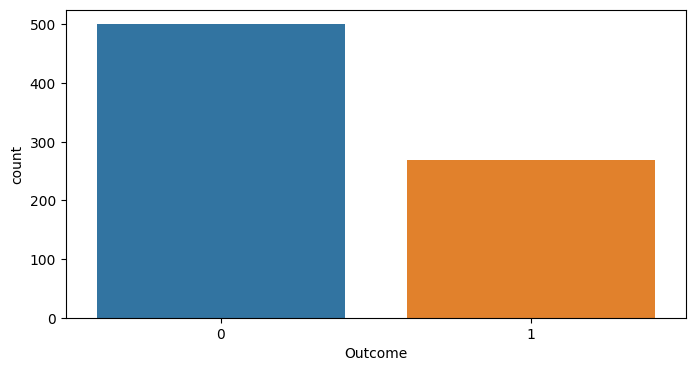

In [12]:
# plot a counter plot to better understand our target feature
plt.figure(figsize=(8,4))
sns.countplot(x = 'Outcome',data = data)
plt.show()

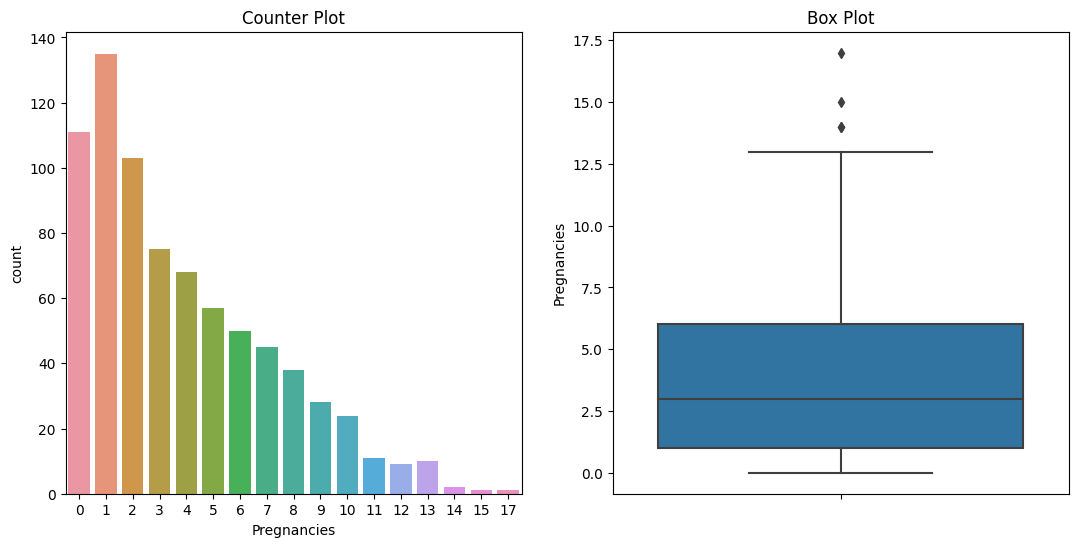

In [13]:
# Pregnancies
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = data)


plt.subplot(1,3,2)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])

plt.show()

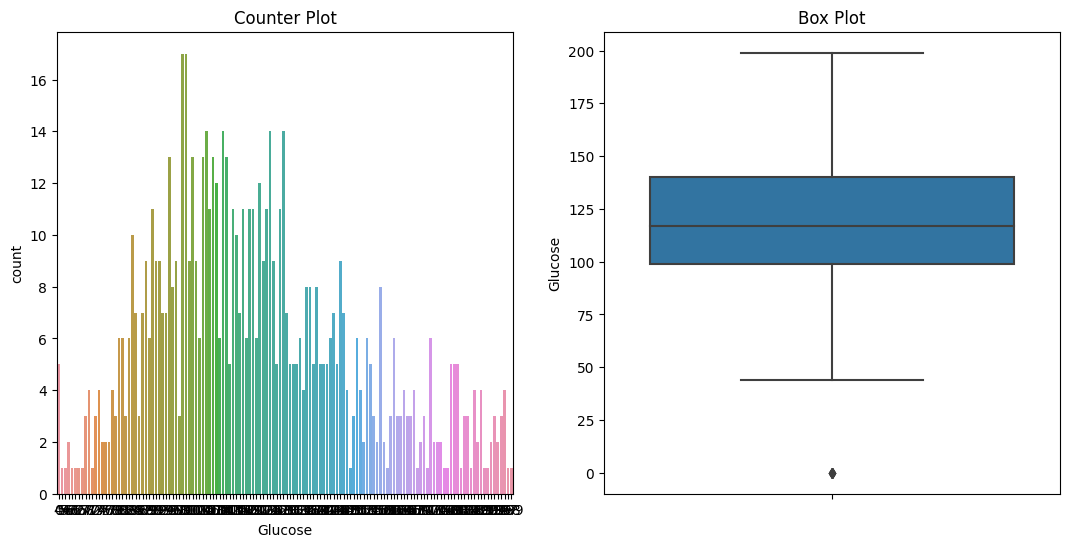

In [14]:
# Glucose
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Glucose',data = data)

plt.subplot(1,3,2)
plt.title('Box Plot')
sns.boxplot(y=data["Glucose"])

plt.show()

In [15]:
# Findin the correlation between each features
corr = data.corr()
# corr

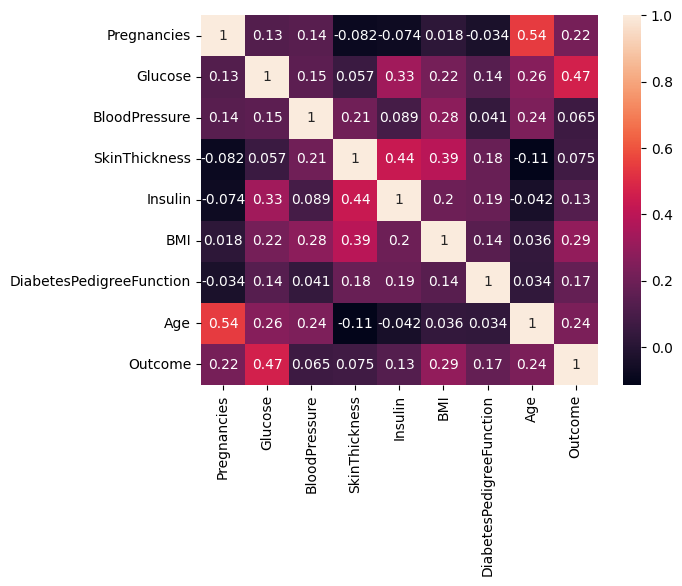

In [16]:
# Headmap
sns.heatmap(corr, annot = True)
plt.show()

**Feture Engineering**

In [17]:
# Replacing zero values with NaN
dataset = data
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [18]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
# Replacing NaN with mean values
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [20]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Preprocessing

In [21]:
#Train, test and validation spilt
from sklearn.model_selection import train_test_split

data_set_values=np.array(dataset)
rows1,cols1=dataset.shape
train, test = train_test_split(data_set_values, test_size = 0.2,random_state=6)


In [22]:
#Spilt all sets and standarization
train_x=train[:,:cols1-1]
train_y=train[:,[cols1-1]]

test_x=test[:,:cols1-1]
test_y=test[:,[cols1-1]]

total_X= np.vstack((train_x,test_x))
mean_data = np.mean(total_X, axis=0)
std_data = np.std(total_X, axis=0)
train_x = (train_x - mean_data)/std_data
test_x = (test_x - mean_data)/std_data
# validate_x = (validate_x - mean_data)/std_data

In [23]:
print(train_x.ndim)
print(train_x.shape)
print(test_x.shape)
print(test_y.shape)


2
(614, 8)
(154, 8)
(154, 1)


**Activation Functions**

In [24]:
def sigmoidFunction(a):    #sigmod function
    return 1/(1+np.exp(-a))

def tanh(b):                #tanh function
    t = (np.exp(b)-np.exp(-b))/(np.exp(b)+np.exp(-b))
    return 1-t**2


Log Loss

In [25]:
def logLoss(m,Y,Z):
    return (-1/m)*np.sum((Y*np.log(Z))+(1-Y)*np.log(1-Z))  # log loss function

 

evalutions

In [26]:
def evalutions(y_actual,y_hat):
    true_pos = 0 #True Positives
    false_pos = 0 # False Positives
    true_neg = 0 # True Negatives
    false_neg = 0 # False Negatives

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            true_pos += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            false_pos += 1
        if y_actual[i]==y_hat[i]==0:
            true_neg += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            false_neg += 1
    #Precision 
    precision = true_pos / (false_pos + true_pos)
    #Recall 
    recall = true_pos / (false_neg + true_pos)
    #Accuracy
    accuracy = ((true_pos + true_neg)/ (true_pos + false_neg + true_neg + false_pos)) * 100
    #F1 Score
    F1_Score = 2* precision * recall/ (precision + recall)
    print(f'Accuracy: {round(accuracy,2)}%')
    print(f'Precision:{round(precision,2)}')
    print(f'Recall Score:{round(recall,2)}')
    print(f'F1 Score:{round(F1_Score,2)}')

Defining training model 

In [27]:
#model class
class model_class:
    def __init__(self,max_epoch,stepsLength):
        self.stepsLength=stepsLength
        self.max_epoch=max_epoch
        self.bias=0.01
        self.function_type="sigmoid"  # default activiation function is sigmoid in my model


    def train(self,X_data,Y,function_type="sigmoid"):   # in the train dateset to training data , update weight and bias in each epoch

        rows,cols=X_data.shape
        self.m=rows
        self.w=np.zeros((cols,1))
        loss_list=[]
        epoch_list=[]
        for epoch in range(self.max_epoch+1):
            
            temp_y=np.dot(X_data,self.w)+self.bias
            
            # to check function type, and using related activiation function to deal with tempary result
            if function_type=="sigmoid":
              
              temp_y_after = sigmoidFunction(temp_y)
            elif function_type=="Tanh":
              self.function_type="Tanh"
              temp_y_after = tanh(temp_y)
            else:
                print("the default activation function is sigmoid function")
                temp_y_after = sigmoidFunction(temp_y)



            #calculating loss
            loss = logLoss(self.m,Y,temp_y_after)
            
            if epoch%100==0:
                epoch_list.append(epoch)
                loss_list.append(loss)
                print("loss",loss)  # print temporary reslut to check loss changing 
  
            # differiating the valuables
            dw=(1/self.m)*np.dot(X_data.T,np.subtract(temp_y_after,Y))
            db=(1/self.m)*np.sum(np.subtract(temp_y_after,Y))
            
            #updating weights and bais 
            self.w = self.w-self.stepsLength*dw
            self.bias = self.bias - self.stepsLength*db
        print(loss)
        plt.plot(epoch_list, loss_list)
        plt.title("loss ")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.show()
        return 

    #Predicting the result set
    def predict(self,X_data):
        temp_y=np.dot(X_data,self.w)+self.bias
        if self.function_type=="sigmoid":
              
              temp_y_after = sigmoidFunction(temp_y)
        elif self.function_type=="Tanh":
              self.function_type="Tanh"
              temp_y_after = tanh(temp_y)
        else:
              print("the default activation function is sigmoid function")
              temp_y_after = sigmoidFunction(temp_y)

     
        results=[]
        for value in temp_y_after:
            if value<0.5:
                results.append(0)
            else:
                results.append(1)
        return results


Training the Model 

loss 0.6946254785534648
loss 0.5967052209977006
loss 0.5526851212384848
loss 0.5289635333656768
loss 0.514464719908266
loss 0.5048397994943377
loss 0.4980815085873179
loss 0.49314191603656216
loss 0.48942151341404616
loss 0.486553043765275
loss 0.4842994839131372
loss 0.48250149690559474
loss 0.48104840150878003
loss 0.47986120580232616
loss 0.47888222970241257
loss 0.4780685165729885
loss 0.4773875187127627
loss 0.4768141967280253
loss 0.47632902473086236
loss 0.47591659087425825
loss 0.4755645979241187
loss 0.47526313793530967
loss 0.4750041580523554
loss 0.4747810617037868
loss 0.4745884071142613
loss 0.4744216767142433
loss 0.4742770988521197
loss 0.47415150854749905
loss 0.4740422377111592
loss 0.47394702783837267
loss 0.4738639600114537
loss 0.473791398358246
loss 0.47372794406282376
loss 0.4736723977195455
loss 0.47362372833503885
loss 0.47358104766563036
loss 0.47354358886587955
loss 0.47351068864257534
loss 0.4734817722758934
loss 0.47345634099848766
loss 0.4734339613235901
lo

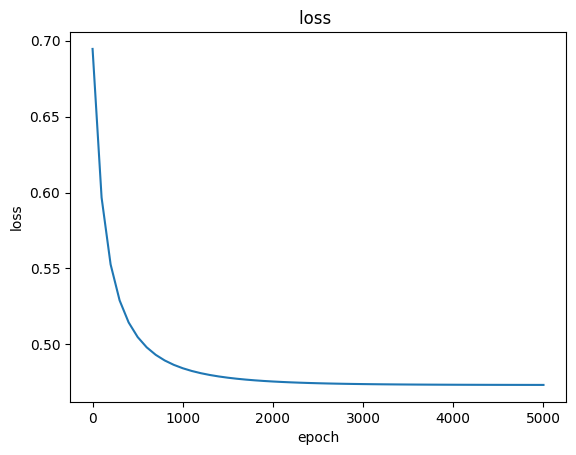

In [28]:
sig_model=model_class(max_epoch=5000,stepsLength=0.01)
sig_model.train(train_x,train_y,'sigmoid')

evaluting the model by running in test data

In [29]:
y_hat = sig_model.predict(test_x)

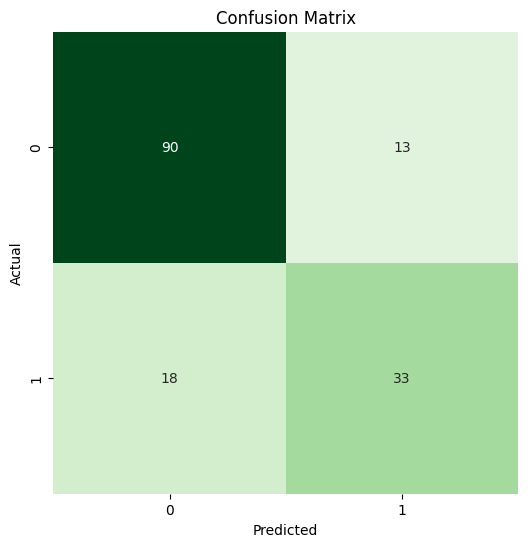

In [30]:
# confusion matrix show the results
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y,y_hat, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5])
plt.yticks(ticks=[0.5,1.5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
# getting F1 Score and others
evalutions(test_y,y_hat)

Accuracy: 79.87%
Precision:0.72
Recall Score:0.65
F1 Score:0.68


Using Tanh Activation Function

Training the Model

loss 5.955298523390626
loss 0.9677643843364399
loss 0.6190154156649115
loss 0.5354013698758672
loss 0.5067541302492423
loss 0.49549991847585556
loss 0.4902803767241394
loss 0.4877401873237722
loss 0.4865721393993882
loss 0.48617471236284043
loss 0.4862470164376629
loss 0.48663081644973916
loss 0.48724432313400046
loss 0.48805466255436153
loss 0.48907158062996936
loss 0.49036432377609884
loss 0.4921430461753252
loss 0.49525197074656296
loss 0.4987974998444643
loss 0.49404452000287563
loss 0.4924393351461642
loss 0.4915283285902886
loss 0.49092754534515987
loss 0.4905005271972028
loss 0.49018295770789827
loss 0.48993949688111516
loss 0.48974873970879457
loss 0.4895968163999106
loss 0.4894742833702384
loss 0.4893744622073301
loss 0.489292486332986
loss 0.4892247223860935
loss 0.48916840293188596
loss 0.48912138457326526
loss 0.48908198366059047
loss 0.48904886173413986
loss 0.4890209438059913
loss 0.4889973588925265
loss 0.48897739596702466
loss 0.488960470814603
loss 0.4889461007349426
l

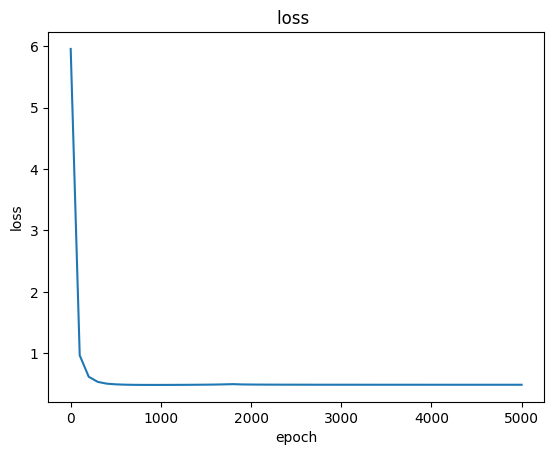

In [32]:
tanh_model=model_class(max_epoch=5000,stepsLength=0.01)
tanh_model.train(train_x,train_y,'Tanh')

evaluting model

In [33]:
y_hat = tanh_model.predict(test_x)

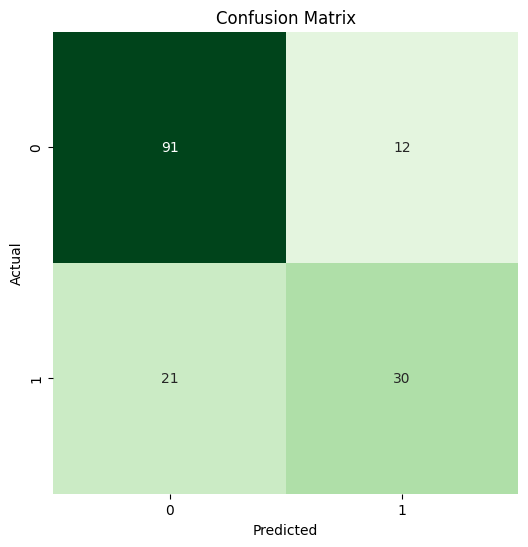

In [34]:
# confusion matrix show the results
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y,y_hat, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5])
plt.yticks(ticks=[0.5,1.5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
evalutions(test_y,y_hat)

Accuracy: 78.57%
Precision:0.71
Recall Score:0.59
F1 Score:0.65
